# Korean corona19 확진자 semi-log 그래프

In [ ]:
x = log(확진자수)
y = 확진자수 증가량

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

%matplotlib inline

In [70]:
df = pd.read_csv('patient.csv')
df

id     sex  birth_year country               region group  \
0        1  female      1984.0   China  filtered at airport   NaN   
1        2    male      1964.0   Korea  filtered at airport   NaN   
2        3    male      1966.0   Korea         capital area   NaN   
3        4    male      1964.0   Korea         capital area   NaN   
4        5    male      1987.0   Korea         capital area   NaN   
...    ...     ...         ...     ...                  ...   ...   
3731  3732     NaN         NaN   Korea                  NaN   NaN   
3732  3733     NaN         NaN   Korea                  NaN   NaN   
3733  3734     NaN         NaN   Korea                  NaN   NaN   
3734  3735     NaN         NaN   Korea                  NaN   NaN   
3735  3736     NaN         NaN   Korea                  NaN   NaN   

     infection_reason  infection_order  infected_by  contact_number  \
0      visit to Wuhan              1.0          NaN            45.0   
1      visit to Wuhan              1.0          NaN            75.0   
2      visit to Wuhan              1.0          NaN            16.0   
3      visit to Wuhan              1.0          NaN            95.0   
4      visit to Wuhan              1.0          NaN            31.0   
...               ...              ...          ...             ...   
3731              NaN              NaN          NaN             NaN   
3732              NaN              NaN          NaN             NaN   
3733              NaN              NaN          NaN             NaN   
3734              NaN              NaN          NaN             NaN   
3735              NaN              NaN          NaN             NaN   

     confirmed_date released_date deceased_date     state  
0        2020-01-20    2020-02-06           NaN  released  
1        2020-01-24    2020-02-05           NaN  released  
2        2020-01-26    2020-02-12           NaN  released  
3        2020-01-27    2020-02-09           NaN  released  
4        2020-01-30           NaN           NaN  isolated  
...             ...           ...           ...       ...  
3731     2020-03-01           NaN           NaN  isolated  
3732     2020-03-01           NaN           NaN  isolated  
3733     2020-03-01           NaN           NaN  isolated  
3734     2020-03-01           NaN           NaN  isolated  
3735     2020-03-01           NaN           NaN  isolated  

[3736 rows x 14 columns]

In [71]:
# get daily confirmed count
daily_count = df.groupby(df.confirmed_date).id.count()

daily_count = pd.DataFrame(daily_count)
daily_count

id
confirmed_date     
2020-01-20        1
2020-01-24        1
2020-01-26        1
2020-01-27        1
2020-01-30        3
2020-01-31        4
2020-02-01        1
2020-02-02        3
2020-02-04        1
2020-02-05        5
2020-02-06        3
2020-02-09        3
2020-02-10        1
2020-02-16        2
2020-02-18        9
2020-02-19       26
2020-02-20       39
2020-02-21      100
2020-02-22      229
2020-02-23      169
2020-02-24      231
2020-02-25      143
2020-02-26      285
2020-02-27      505
2020-02-28      571
2020-02-29      813
2020-03-01      586

In [72]:
# 3월 2일 추가
day_plus = pd.DataFrame([476], index = ['2020-03-02'], columns = ['id'] )
daily_count = pd.concat([daily_count, day_plus])
daily_count

id
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
2020-01-31    4
2020-02-01    1
2020-02-02    3
2020-02-04    1
2020-02-05    5
2020-02-06    3
2020-02-09    3
2020-02-10    1
2020-02-16    2
2020-02-18    9
2020-02-19   26
2020-02-20   39
2020-02-21  100
2020-02-22  229
2020-02-23  169
2020-02-24  231
2020-02-25  143
2020-02-26  285
2020-02-27  505
2020-02-28  571
2020-02-29  813
2020-03-01  586
2020-03-02  476

In [74]:
plt.semilogy(daily_count)
plt.title('Korean corona19 cases')
plt.xticks(rotation=45)
plt.ylim([1,10000])

(1, 10000)

In [75]:
# 대확산시기(31번확진자) 이후로 나눠서 그래프 그려보기
daily_count_f = daily_count.iloc[14:]
daily_count_f

id
2020-02-18    9
2020-02-19   26
2020-02-20   39
2020-02-21  100
2020-02-22  229
2020-02-23  169
2020-02-24  231
2020-02-25  143
2020-02-26  285
2020-02-27  505
2020-02-28  571
2020-02-29  813
2020-03-01  586
2020-03-02  476

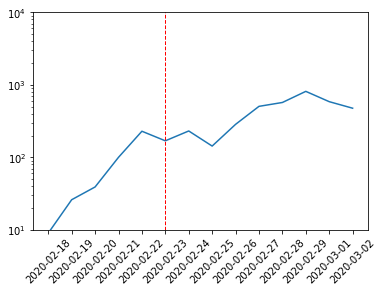

In [76]:
# 23일 비상시국 표시한 그래프
plt.semilogy(daily_count_f)
plt.xticks(rotation=45)
plt.ylim([10,10000])
plt.axvline(x='2020-02-23', color = 'red', linewidth=1,linestyle='--')